<a href="https://colab.research.google.com/github/brandnewmin/brandnewm/blob/master/%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 데이터 적재 : 데이터 불러오기
2. 훈련 데이터와 테스트 데이터로 나누기
3. 데이터 살펴보기 : 산점도
4. 모델링 : K-NN 분류기
5. 모델 예측하기
6. 모델 평가하기

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155225 files and di

# CHAPTER 2. 지도 학습

In [1]:
pip install mglearn

     |████████████████████████████████| 540 kB 28.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=bf88f7a2287ad7b49a3dd04152812413bce5f9f48141d2eb8d24c4f0199f1829
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

plt.rc('font', family='NanumBarunGothic') 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


X.shape : (26, 2)


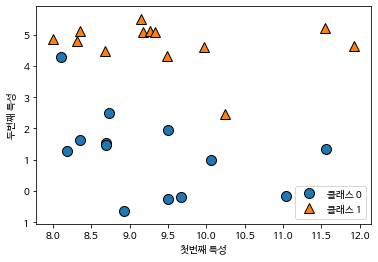

In [ ]:
# 2.3.1 (58쪽)
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['클래스 0','클래스 1'], loc = 4)
plt.xlabel('첫번째 특성')
plt.ylabel('두번째 특성')
print('X.shape :', X.shape)

In [ ]:
#mglearn.datasets.make_forge()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


(array([[ 9.96346605,  4.59676542],
        [11.0329545 , -0.16816717],
        [11.54155807,  5.21116083],
        [ 8.69289001,  1.54322016],
        [ 8.1062269 ,  4.28695977],
        [ 8.30988863,  4.80623966],
        [11.93027136,  4.64866327],
        [ 9.67284681, -0.20283165],
        [ 8.34810316,  5.13415623],
        [ 8.67494727,  4.47573059],
        [ 9.17748385,  5.09283177],
        [10.24028948,  2.45544401],
        [ 8.68937095,  1.48709629],
        [ 8.92229526, -0.63993225],
        [ 9.49123469,  4.33224792],
        [ 9.25694192,  5.13284858],
        [ 7.99815287,  4.8525051 ],
        [ 8.18378052,  1.29564214],
        [ 8.7337095 ,  2.49162431],
        [ 9.32298256,  5.09840649],
        [10.06393839,  0.99078055],
        [ 9.50048972, -0.26430318],
        [ 8.34468785,  1.63824349],
        [ 9.50169345,  1.93824624],
        [ 9.15072323,  5.49832246],
        [11.563957  ,  1.3389402 ]]),
 array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 

In [ ]:
#type(mglearn.datasets.make_forge())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


tuple

In [ ]:
# print( X[:,0], len(X), len(y) )

[ 9.96346605 11.0329545  11.54155807  8.69289001  8.1062269   8.30988863
 11.93027136  9.67284681  8.34810316  8.67494727  9.17748385 10.24028948
  8.68937095  8.92229526  9.49123469  9.25694192  7.99815287  8.18378052
  8.7337095   9.32298256 10.06393839  9.50048972  8.34468785  9.50169345
  9.15072323 11.563957  ] 26 26


## 회귀 알고리즘을 위한 wave 데이터셋 - p.59

Text(0, 0.5, 'target')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


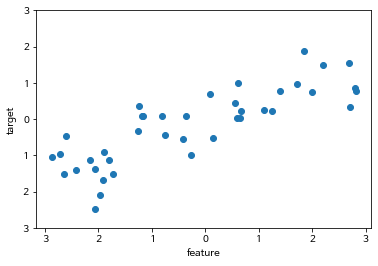

In [ ]:
X,y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('feature')
plt.ylabel('target')
# 선형성 확인

## load_breast_cancer

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(' cancer.keys() :\n', cancer.keys())

 cancer.keys() :
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
# type(cancer)

sklearn.utils.Bunch

In [ ]:
# cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [ ]:
print("유방암 데이터의 형태 :", cancer.data.shape)

유방암 데이터의 형태 : (569, 30)


In [ ]:
print('클래스 별 샘플 개수 : \n',
      {n : v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스 별 샘플 개수 : 
 {'malignant': 212, 'benign': 357}


In [ ]:
print('특성 이름 :\n', cancer.feature_names)

특성 이름 :
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## 회귀 알고리즘을 위한 보스턴 주택가격 - p.62

In [ ]:
# 다양한 특성(범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보)을 이용해 보스턴 주변의 주택 평균 가격 예측하기

## 데이터 적재
from sklearn.datasets import load_boston
boston = load_boston()
print('데이터  형태 : ', boston.data.shape)

데이터  형태 :  (506, 13)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
# 특성 공학(feature engineering)이 반영된 데이터셋
## 특성 공학이란? 특성(feature)끼리 곱도 특성으로 생각하는 개념

# 데이터 적재
X, y = mglearn.datasets.load_extended_boston()
print('X shape : ',X.shape)

X shape :  (506, 104)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# mglearn.datasets.load_extended_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

(array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
         1.00000000e+00, 8.96799117e-02, 8.04248656e-03],
        [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
         1.00000000e+00, 2.04470199e-01, 4.18080621e-02],
        [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
         9.79579831e-01, 6.28144504e-02, 4.02790570e-03],
        ...,
        [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
         1.00000000e+00, 1.07891832e-01, 1.16406475e-02],
        [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
         9.82676920e-01, 1.29930407e-01, 1.71795127e-02],
        [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
         1.00000000e+00, 1.69701987e-01, 2.87987643e-02]]),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7,

## 2.3.2 K-최근접 이웃

In [ ]:
# knn_classification
# n_neighbors

In [ ]:
# 훈련 / 테스트 데이터로 나누기

from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge() # 데이터 적재

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# mglearn.datasets.make_forge()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


(array([[ 9.96346605,  4.59676542],
        [11.0329545 , -0.16816717],
        [11.54155807,  5.21116083],
        [ 8.69289001,  1.54322016],
        [ 8.1062269 ,  4.28695977],
        [ 8.30988863,  4.80623966],
        [11.93027136,  4.64866327],
        [ 9.67284681, -0.20283165],
        [ 8.34810316,  5.13415623],
        [ 8.67494727,  4.47573059],
        [ 9.17748385,  5.09283177],
        [10.24028948,  2.45544401],
        [ 8.68937095,  1.48709629],
        [ 8.92229526, -0.63993225],
        [ 9.49123469,  4.33224792],
        [ 9.25694192,  5.13284858],
        [ 7.99815287,  4.8525051 ],
        [ 8.18378052,  1.29564214],
        [ 8.7337095 ,  2.49162431],
        [ 9.32298256,  5.09840649],
        [10.06393839,  0.99078055],
        [ 9.50048972, -0.26430318],
        [ 8.34468785,  1.63824349],
        [ 9.50169345,  1.93824624],
        [ 9.15072323,  5.49832246],
        [11.563957  ,  1.3389402 ]]),
 array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 

In [ ]:
# 모델링
# > import
# > 객체 생성
# > 매개 변수 지정

from sklearn.neighbors import KNeighborsClassifier # import 
clf = KNeighborsClassifier(n_neighbors = 3) # 객체 생성 & 매개 변수 지정

In [ ]:
# 훈련 세트로 모델 학습하기
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# 테스트 데이터로 모델 평가하기
print('테스트 세트 예측 : ', clf.predict(X_test))

테스트 세트 예측 :  [1 0 1 0 1 0 0]


In [ ]:
print('테스트 세트 정확도 : {:.2f}'.format(clf.score(X_test, y_test)))

테스트 세트 정확도 : 0.86


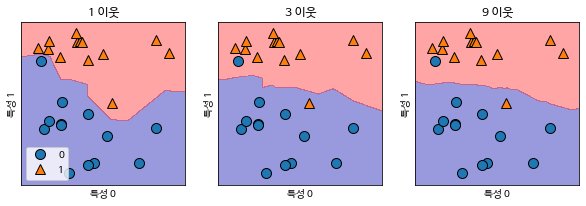

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (10,3))

for n_neighbors, ax in zip([1,3,9], axes):
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps = 0.5, ax = ax , alpha = .4)
  mglearn.discrete_scatter(X[:,0], X[:,1], y, ax = ax)
  ax.set_title('{} 이웃'.format(n_neighbors))
  ax.set_xlabel('특성 0')
  ax.set_ylabel('특성 1')

axes[0].legend(loc = 3)

In [ ]:
clf

KNeighborsClassifier(n_neighbors=9)

## load_breast_cancer p-67

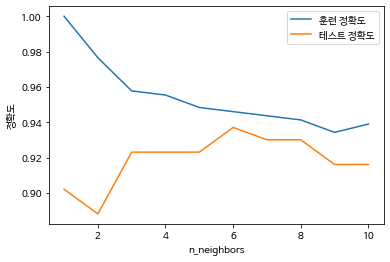

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 66
)
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
  clf = KNeighborsClassifier(n_neighbors=n_neighbors) # 객체 생성 & 매개 변수 지정
  clf.fit(X_train, y_train) # .fit
  training_accuracy.append(clf.score(X_train, y_train)) #.score : 정확도 검증
  test_accuracy.append(clf.score(X_test, y_test))


plt.plot(neighbors_settings, training_accuracy, label = '훈련 정확도')
plt.plot(neighbors_settings, test_accuracy, label = '테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()

## wave p-69

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
print('테스트 세트에 대한 예측 : \n', reg.predict(X_test))

테스트 세트에 대한 예측 : 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [ ]:
# 회귀 모형에 대해서 정확도 검증을 할 땐, 결정계수를 뱉음

print('테스트 세트 R^2 : {:.2f}'.format(reg.score(X_test, y_test)))

테스트 세트 R^2 : 0.83


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


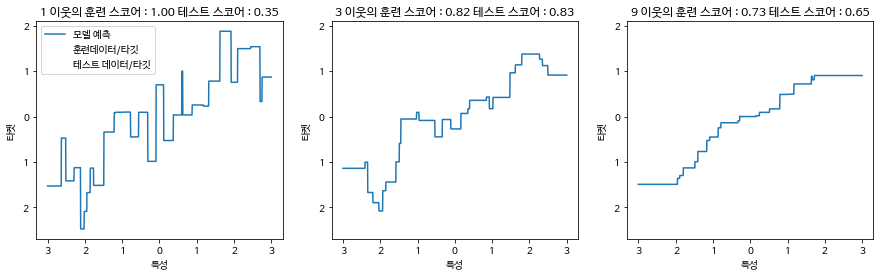

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (15,4))
line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, "^", c = mglearn.cm2(0), markersize = 0)
  ax.plot(X_test, y_test,"v", c = mglearn.cm2(1), markersize = 0)

  ax.set_title(
      '{} 이웃의 훈련 스코어 : {:.2f} 테스트 스코어 : {:.2f}'.format(
          n_neighbors, reg.score(X_train, y_train),
          reg.score(X_test, y_test)))
  ax.set_xlabel('특성')
  ax.set_ylabel('타켓')

axes[0].legend(['모델 예측', '훈련데이터/타깃',
                 '테스트 데이터/타깃'], loc = 'best')

In [ ]:
# np.linspace(-3, 3, 1000).reshape(-1,1)
# -3 ~ 3까지  1000개 찍어라? 나눠라?
# len(~) 값이 1000
# reshape(-1, 1) 총 n개 값을 출력할 때 배열을 어떻게 해서 보여줄 것인지를 의미한다.
  # 1은 1열로 보여주란 의미를 갖는다
  # -1은 몇 개의 행으로 보여줄지 구체적으로 정하지 못했을 때, 열의 값에 따라서 알아서 계산해서 행의 값을 지정하란 의미이다.

array([[-3.        ],
       [-2.99399399],
       [-2.98798799],
       [-2.98198198],
       [-2.97597598],
       [-2.96996997],
       [-2.96396396],
       [-2.95795796],
       [-2.95195195],
       [-2.94594595],
       [-2.93993994],
       [-2.93393393],
       [-2.92792793],
       [-2.92192192],
       [-2.91591592],
       [-2.90990991],
       [-2.9039039 ],
       [-2.8978979 ],
       [-2.89189189],
       [-2.88588589],
       [-2.87987988],
       [-2.87387387],
       [-2.86786787],
       [-2.86186186],
       [-2.85585586],
       [-2.84984985],
       [-2.84384384],
       [-2.83783784],
       [-2.83183183],
       [-2.82582583],
       [-2.81981982],
       [-2.81381381],
       [-2.80780781],
       [-2.8018018 ],
       [-2.7957958 ],
       [-2.78978979],
       [-2.78378378],
       [-2.77777778],
       [-2.77177177],
       [-2.76576577],
       [-2.75975976],
       [-2.75375375],
       [-2.74774775],
       [-2.74174174],
       [-2.73573574],
       [-2

## 2.3.3 선형 모델

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

lr = LinearRegression().fit(X_train, y_train) #train set fit

In [ ]:
print('lr.coef : ', lr.coef_)
print('lr.intercept_ : ',lr.intercept_)

lr.coef :  [0.39390555]
lr.intercept_ :  -0.031804343026759746


In [ ]:
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


## 보스턴 주택 가격 - p.77

In [ ]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
print('훈련 세트 점수 : {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


## 리지 회귀 : 보스턴 주택 가격 데이터셋 - p.78

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75


In [ ]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수 : 0.79
테스트 세트 점수 : 0.64


In [ ]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.77


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


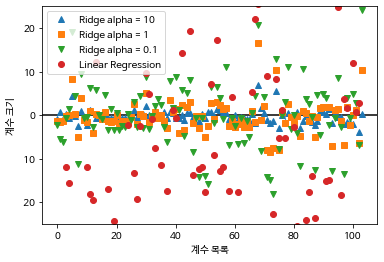

In [ ]:
plt.plot(ridge10.coef_,'^',label = 'Ridge alpha = 10')
plt.plot(ridge.coef_, 's', label = 'Ridge alpha = 1')
plt.plot(ridge01.coef_, 'v', label = 'Ridge alpha = 0.1')

plt.plot(lr.coef_,'o',label = 'Linear Regression')
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

## 라소 : 보스턴 주택 가격 - p.83

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수 : ",np.sum(lasso.coef_ != 0))

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성의 개수 :  4


In [ ]:
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수 ; {:.2f}".format(lasso001.score(X_test,y_test)))
print("사용한 특성의 계수 : ", np.sum(lasso001.coef_ != 0))

훈련 세트 점수 : 0.90
테스트 세트 점수 ; 0.77
사용한 특성의 계수 :  33


In [ ]:
# lasso001.coef_

array([ -0.        ,  -0.        ,  -0.        ,   0.        ,
        -0.        ,   0.        ,  -0.        ,  -1.43260465,
        10.94771183,   0.        ,   0.        ,   0.        ,
        -0.39260971,  -0.        ,  -0.        ,  -0.        ,
         0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -8.75628457,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,   2.10027365,  -0.        ,
         0.        ,  -0.        ,   0.        ,  -0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
        -0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,  -0.        ,   0.        ,  -3.96958293,
         0.        ,   6.61845793,  -0.        ,  -0.        ,
        -0.        ,   0.        ,  -4.42086828,  -2.10371434,
         3.79607992,  -0.        ,   4.38591262,   0.        ,
         0.        ,   0.1795777 ,  -0.        ,  -1.1614282 ,
        -4.33485764,  -0.        ,  -0.        ,  -2.13

In [ ]:
# R 에서 변수의 유의확률 확인하는 것처럼 파이썬에서도 할 수 없나?

In [ ]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 10000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수 : ", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.65
사용한 특성의 개수 :  97


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.532e+02, tolerance: 3.233e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
# alpha 값을 너무 낮추면 규제의 효과가 없어져 linearregression의 결과와 비슷해진다.
# alpha 값을 낮출수록 계수를 다양하게 사용해, 복잡한 모형을 만든다고 생각했는데
# 그게 아닌거야?
# linear regression은 가장 단순한 모형이라고 생각했어.

Text(0, 0.5, '계수 크기')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


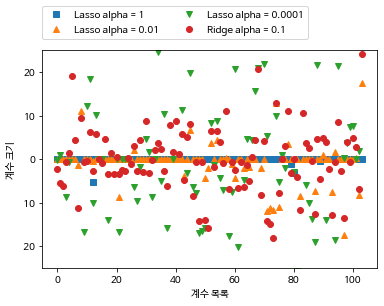

In [ ]:
plt.plot(lasso.coef_, 's', label = 'Lasso alpha = 1')
plt.plot(lasso001.coef_, '^', label = 'Lasso alpha = 0.01')
plt.plot(lasso00001.coef_, 'v', label = 'Lasso alpha = 0.0001')

plt.plot(ridge01.coef_, 'o', label = 'Ridge alpha = 0.1')
plt.legend(ncol = 2, loc = (0,1.05))
plt.ylim(-25,25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

## 분류용 선형 모델

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


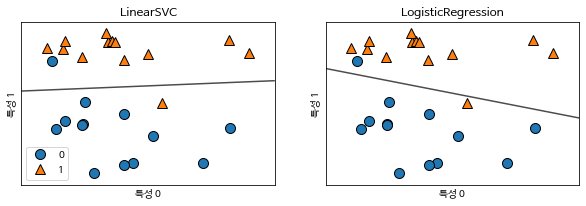

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2, figsize = (10,3))

for model, ax in zip([LinearSVC(max_iter = 5000), LogisticRegression()], axes):
  clf = model.fit(X,y)
  mglearn.plots.plot_2d_separator(clf, X, fill = False, eps = 0.5,
                                  ax = ax, alpha = .7)
  mglearn.discrete_scatter(X[:,0], X[:,1], y, ax = ax)
  ax.set_title(clf.__class__.__name__)
  ax.set_xlabel("특성 0")
  ax.set_ylabel('특성 1')
axes[0].legend()

## 유방암 데이터셋 - p.89

In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
logreg = LogisticRegression(max_iter = 5000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수 : 0.958
테스트 세트 점수 : 0.958


In [12]:
# print("훈련 세트 점수 : {:.3f}".format(100* logreg.score(X_train, y_train)))

In [13]:
logreg100 = LogisticRegression(C= 100, max_iter = 5000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수 : 0.984
테스트 세트 점수 : 0.972


In [14]:
logreg001 = LogisticRegression(C = 0.01, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수 : 0.953
테스트 세트 점수 : 0.951


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


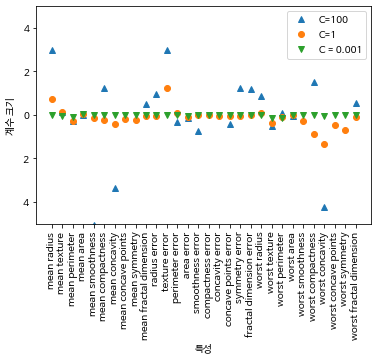

In [15]:
plt.plot(logreg100.coef_.T, '^', label = 'C=100')
plt.plot(logreg.coef_.T, 'o', label = 'C=1')
plt.plot(logreg001.coef_.T, 'v', label = 'C = 0.001')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
xlims = plt.xlim()
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel('특성')
plt.ylabel("계수 크기")
plt.legend()

In [15]:
# L1 규제

C = 0.001 인 l1 로지스틱 회귀의 훈련 정확도 : 0.91
C = 0.001 인 l1 로지스틱 회귀의 테스트 정확도 : 0.92
C = 1.000 인 l1 로지스틱 회귀의 훈련 정확도 : 0.96
C = 1.000 인 l1 로지스틱 회귀의 테스트 정확도 : 0.96
C = 100.000 인 l1 로지스틱 회귀의 훈련 정확도 : 0.99
C = 100.000 인 l1 로지스틱 회귀의 테스트 정확도 : 0.98


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


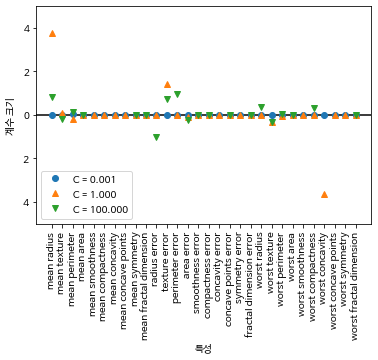

In [16]:
for C, marker in zip([0.001, 1, 100], ['o','^','v']):
  lr_l1 = LogisticRegression(solver= 'liblinear', C=C, penalty='l1', max_iter = 1000).fit(X_train, y_train)
  print("C = {:.3f} 인 l1 로지스틱 회귀의 훈련 정확도 : {:.2f}".format(
      C, lr_l1.score(X_train, y_train)))
  print("C = {:.3f} 인 l1 로지스틱 회귀의 테스트 정확도 : {:.2f}".format(C, lr_l1.score(X_test, y_test)))
  plt.plot(lr_l1.coef_.T, marker, label = "C = {:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5,5)
plt.legend(loc = 3)

## 다중 클래스 분류용 선형 모델 - p.93

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


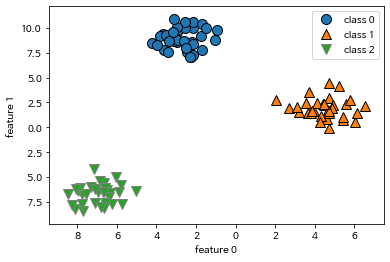

In [18]:
# 세 개 클래스를 갖고 있는 데이터셋
# 일대다 분류
# 각 클래스의 데이터는 정규분포를 따른다.

from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2'])

In [19]:
#LinearSVC 분류기
linear_svm = LinearSVC().fit(X,y)
print("계수 배열의 크기 : ", linear_svm.coef_.shape)
print("절편 배열의 크기 : ", linear_svm.intercept_.shape)

계수 배열의 크기 :  (3, 2)
절편 배열의 크기 :  (3,)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


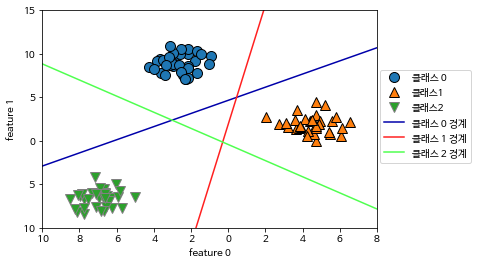

In [20]:
# 세 이진 분류기(일대다 분류기 세 개) 시각화
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color) 

plt.ylim(-10,15)
plt.xlim(-10, 8)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['클래스 0', '클래스1', '클래스2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'],
           loc = (1.01, 0.3))

Text(0, 0.5, '특성 1')

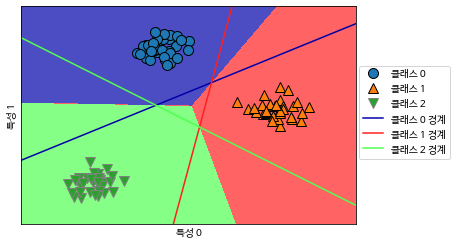

In [24]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill= True, alpha = .7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)
plt.legend(['클래스 0','클래스 1','클래스 2','클래스 0 경계', '클래스 1 경계','클래스 2 경계'], loc = (1.01, 0.3))
plt.xlabel('특성 0')
plt.ylabel('특성 1')

## 2.3.4 나이브 베이즈 분류기